In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
print(f"columns | Mean |Median |Standard Deviation |Min |Max |")
for col in df.select_dtypes(include="number"):
    print(f"{col} | {df[col].mean():0.2f} | {df[col].median():0.2f} | {df[col].std():0.2f} | {df[col].min():0.2f} | {df[col].max():0.2f}")

columns | Mean |Median |Standard Deviation |Min |Max |
total_bill | 19.79 | 17.80 | 8.90 | 3.07 | 50.81
tip | 3.00 | 2.90 | 1.38 | 1.00 | 10.00
size | 2.57 | 2.00 | 0.95 | 1.00 | 6.00


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [42]:
# average tip
df.groupby('sex')['tip'].apply(np.mean)

C:\Users\Nikhil Vishwakarma\AppData\Local\Temp\ipykernel_12404\1586822661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip'].apply(np.mean)


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [48]:
# percentage of smoker and non smoker
df['smoker'].value_counts()/len(df.smoker)*100

smoker
No     61.885246
Yes    38.114754
Name: count, dtype: float64

In [58]:
# max bill day
idx = df['total_bill'].argmax()
df['day'][idx]

'Sat'

C:\Users\Nikhil Vishwakarma\AppData\Local\Temp\ipykernel_12404\3527409018.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df.groupby('sex')['tip'].apply(np.mean), color='red')


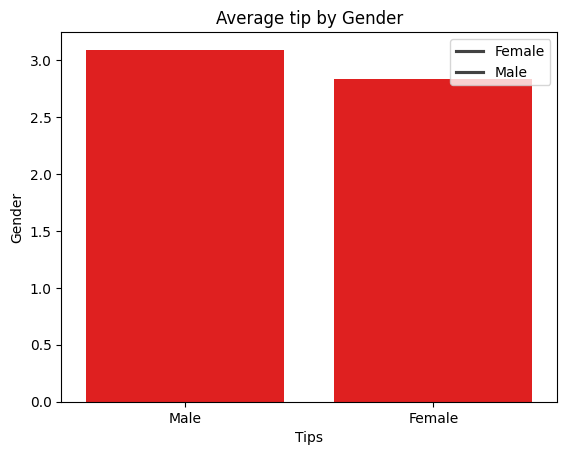

In [80]:
# average tip
import matplotlib.pyplot as plt

sns.barplot(df.groupby('sex')['tip'].apply(np.mean), color='red')
plt.title("Average tip by Gender")
plt.xlabel('Tips')
plt.ylabel('Gender')
plt.legend(df.sex.unique())
plt.show()

<Axes: >

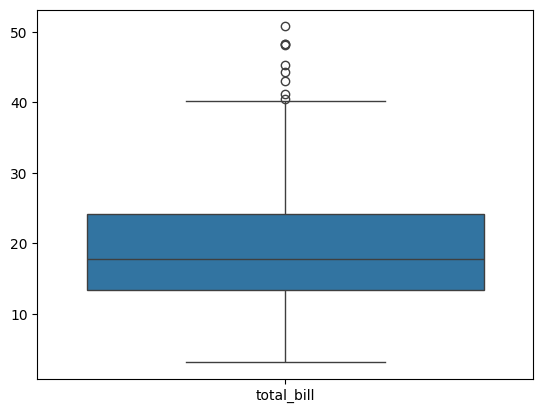

In [70]:
sns.boxplot(data=df[['smoker','total_bill']])

Text(0, 0.5, 'Tips')

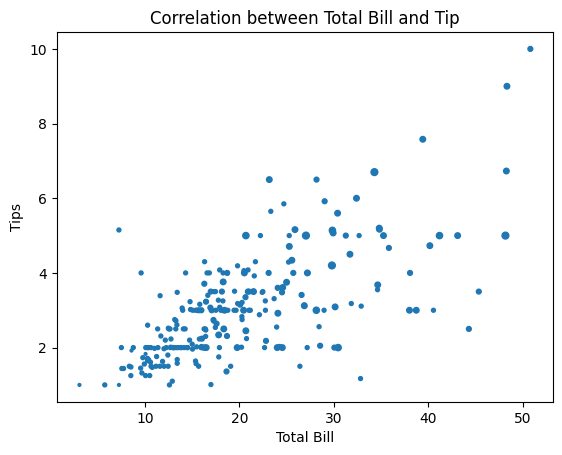

In [90]:
plt.scatter(x=df.total_bill, y=df.tip, s=df['size']*4)
plt.title("Correlation between Total Bill and Tip")
plt.xlabel('Total Bill')
plt.ylabel('Tips')

Text(50.722222222222214, 0.5, "['total_bill', 'tip']")

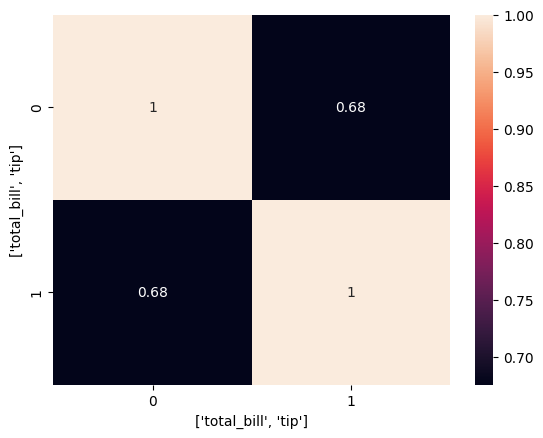

In [100]:
corr = np.corrcoef(df.total_bill,df.tip)
sns.heatmap(corr, annot=True)
labels = ["total_bill","tip"]
plt.xlabel(labels)
plt.ylabel(labels)

<Axes: >

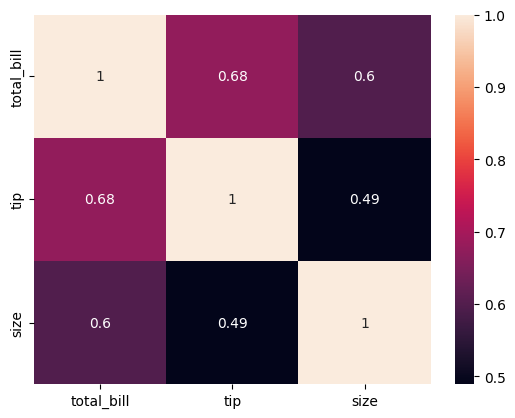

In [104]:
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True)